[0 0 0 1 1]
[0.0629065  0.16055696 0.35273334 0.6082585  0.81563382]


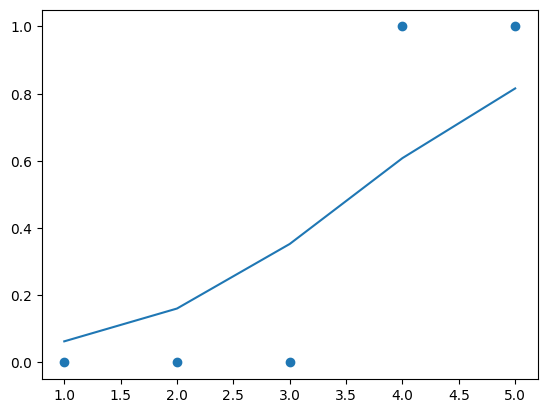

In [6]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression

X =  np.array([[1], [2], [3], [4], [5]])
y = np.array([0, 0, 0, 1, 1])

model = LogisticRegression()
model.fit(X, y)

y_pred = model.predict(X)
y_prob = model.predict_proba(X)[:,1]

print(y_pred)
print(y_prob)

plt.scatter(X, y)
plt.plot(X, y_prob)
plt.show()

[[51  6]
 [ 2 84]]
              precision    recall  f1-score   support

           0       0.96      0.89      0.93        57
           1       0.93      0.98      0.95        86

    accuracy                           0.94       143
   macro avg       0.95      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143



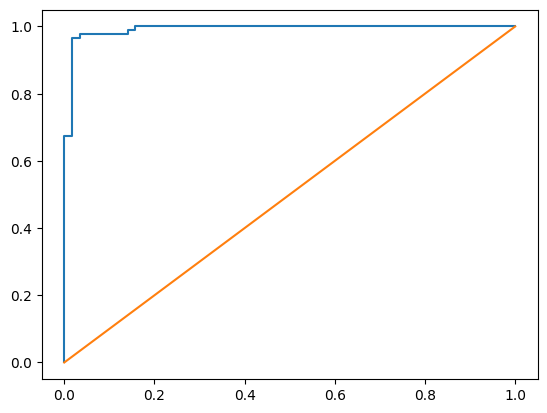

In [36]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,  classification_report

data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y)

model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)
accuracy = accuracy_score(y_pred, y_test)
# print(accuracy)
# print(y_prob)

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# print("Confusion Matrix:\n", conf_matrix) # TN, FP, FN, TP ---> TN = True Negative, FP = False Positive, FN = False Negative, TP = True Positive
# print()
# print(f"True Negative: {conf_matrix[0][0]}")
# print(f"False Positive: {conf_matrix[0][1]}")
# print(f"False Negative: {conf_matrix[1][0]}")
# print(f"True Positive: {conf_matrix[1][1]}")

c_report = classification_report(y_test, y_pred)
print(c_report)

from sklearn.metrics import roc_curve, auc  

y_prob = model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr)
plt.plot([0,1], [0,1])
plt.show()